In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [3]:
# 数据加载
data=pd.read_csv('used_car_train_20200313.csv',sep=' ')
data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


In [4]:
# 查看数据
data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


bodyType: 车身类型：豪华轿车：0，微型车：1，厢型车：2，大巴车：3，敞篷车：4，双门汽车：5，商务车：6，搅拌车：7  
fuelType: 燃油类型：汽油：0，柴油：1，液化石油气：2，天然气：3，混合动力：4，其他：5，电动：6  
gearbox: 变速箱：手动：0，自动：1

<AxesSubplot:>

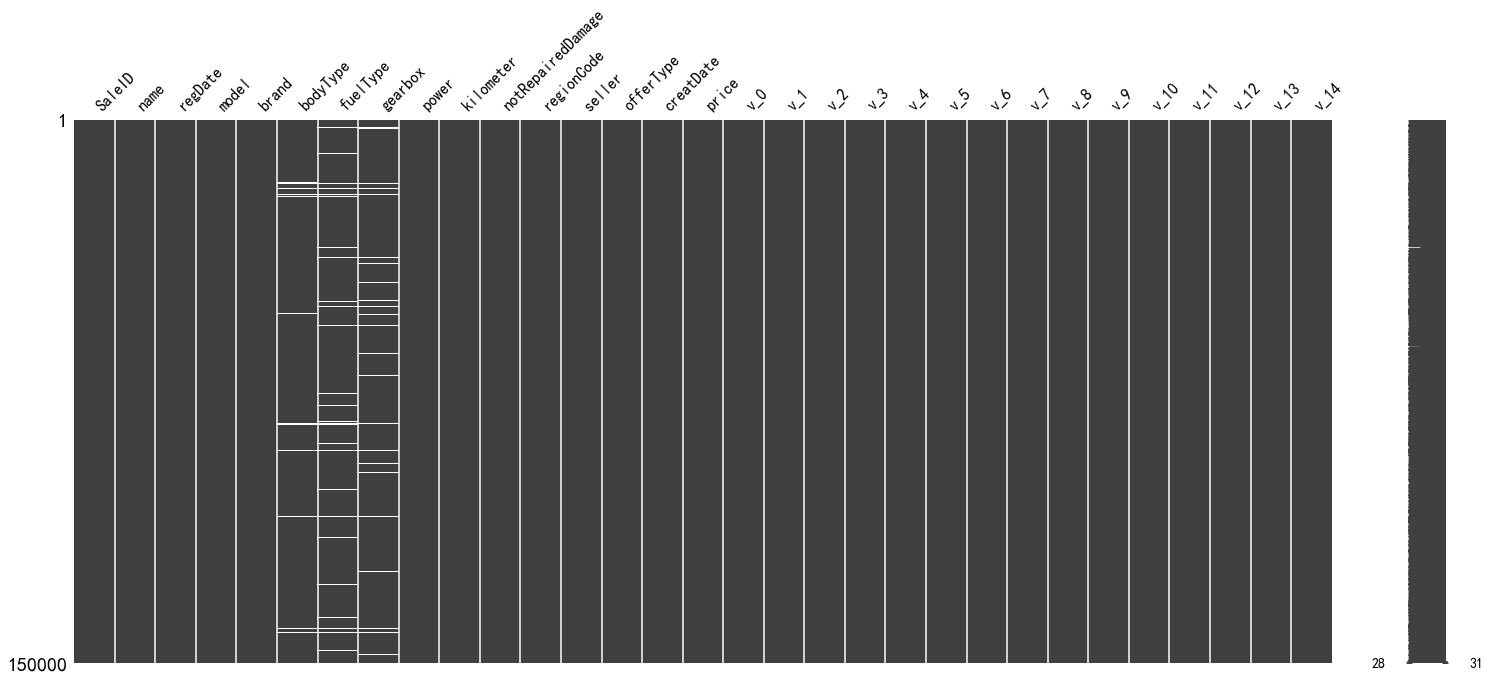

In [5]:
# 缺失值可视化
msno.matrix(data)

<AxesSubplot:>

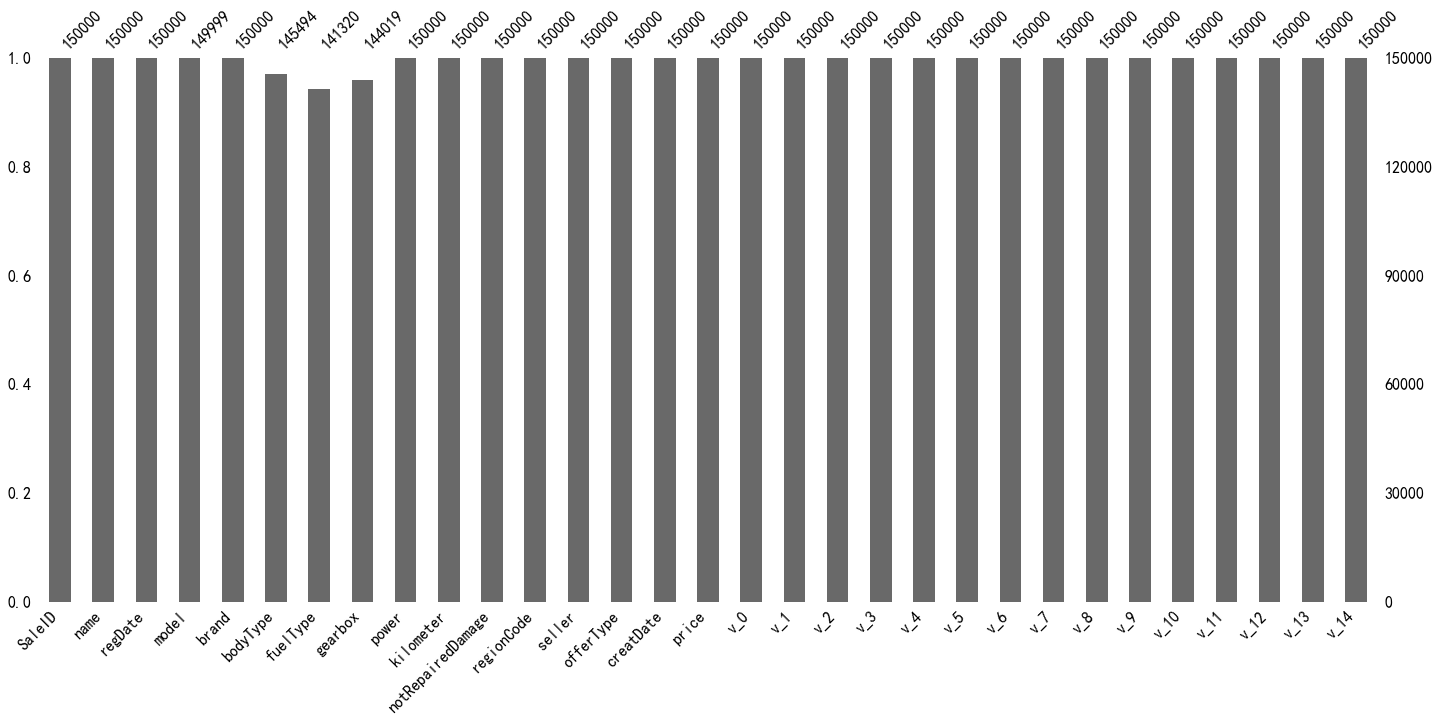

In [6]:
# 条形图可视化
msno.bar(data)

<AxesSubplot:>

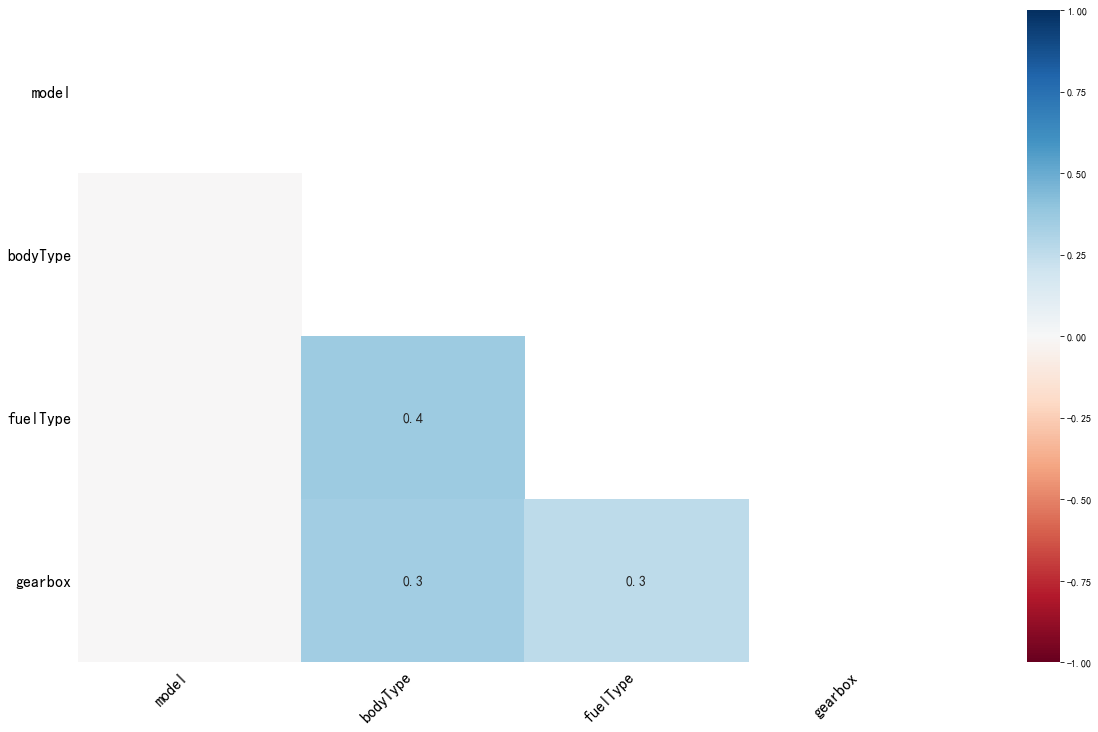

In [7]:
msno.heatmap(data)

### 单一变量结论：
+ 车身类型  
  商务车、双门汽车、敞篷车，这三种车型在市场中，二手车价格位居前三；豪华轿车交易价值较低；微型车交易价值最低  
+ 变速箱  
  二手车交易市场，手动挡车居多；但自动挡的二手交易价格较高，交易均值超过手动挡二倍；
+ 燃油类型  
  二手车交易市场，以汽油、柴油为燃油的车居多；混合动力、电动、柴油为主的交易价值高于其它燃油类型的  
+ 其它探索略

In [8]:
# pandas_profiling 一行代码生成报告
# report = pp.ProfileReport(data)
# report.to_file('report.html')

## 一、查看预测值价格情况

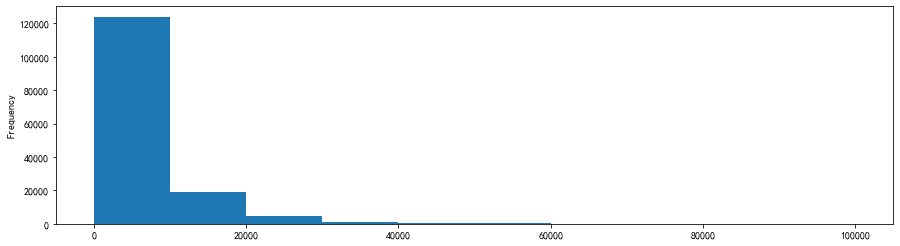

In [9]:
data['price'].plot(kind='hist',figsize=(15,4))
plt.show()

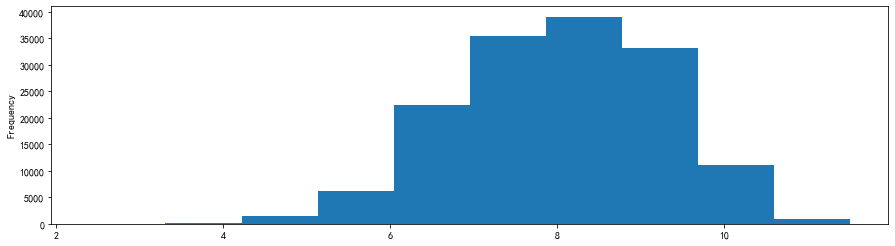

In [10]:
# 价格属于长尾分布，对价格进行log转换,消除长尾带来方差不稳定现象
data['log_price']=data['price'].apply(lambda x:np.log(x))
data['log_price'].plot(kind='hist',figsize=(15,4))
plt.show()

## 二、数据处理
+ 基于预测值地变量探索筛选，只要地数据类型涉及
  + 1.日期维度  
     “regDate”,“create_date”
  + 2.类别特征  
     “brand”、“model”、“kilometer”、“bodyType”、“fuelType”、“power”  
  + 3.连续特征  
      “v_1”，“v_2”，……，“v_12”

### 处理 regDate 

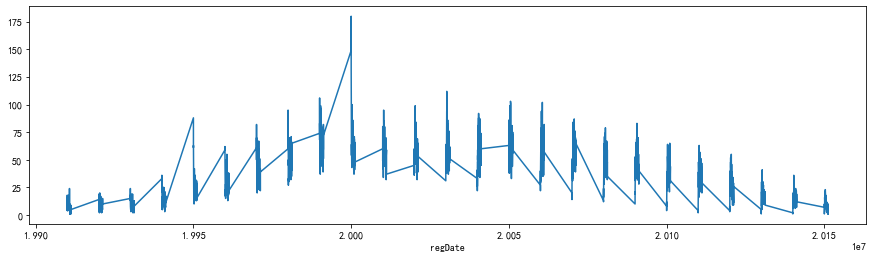

In [11]:
data.groupby(['regDate'])['price'].count().sort_index().plot(figsize=(15,4))
plt.show()

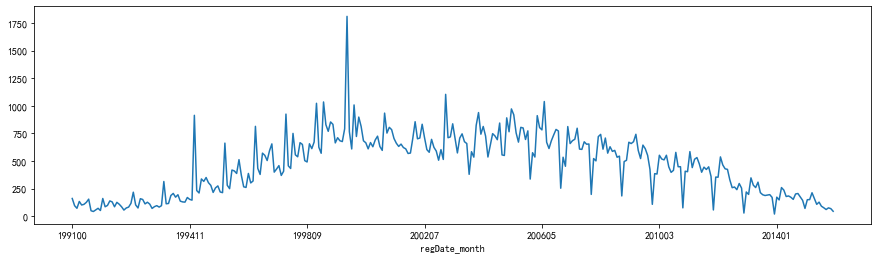

In [12]:
# 产看月份情况
data['regDate_month']=data['regDate'].apply(lambda x:str(x)[:6])
data.groupby(['regDate_month'])['price'].count().sort_index().plot(figsize=(15,4))
plt.show()

### 处理 regionCode
  根据常识，经济发达地区和不发达地区，销量和价格应该是有一定区分的。所以regionCode变量要保留。

In [13]:
data['regionCode'].apply(lambda x : str(x)[:-3]).value_counts()

     36680
1    31886
2    26481
3    20545
4    14969
5    10047
6     6304
7     2986
8      102
Name: regionCode, dtype: int64

### 处理creatDate
在下图，看到数据大多数都在2016年，且2015年价格偏低

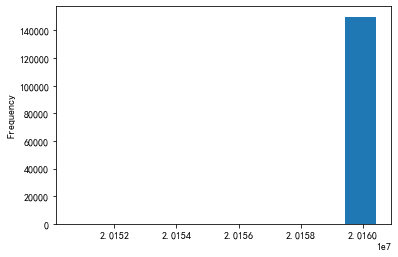

In [14]:
data['creatDate'].plot(kind='hist')
plt.show()

In [15]:
data['creatDate'].value_counts()

20160403    5848
20160404    5606
20160320    5485
20160312    5383
20160402    5382
            ... 
20151227       1
20151217       1
20160131       1
20160130       1
20160115       1
Name: creatDate, Length: 96, dtype: int64

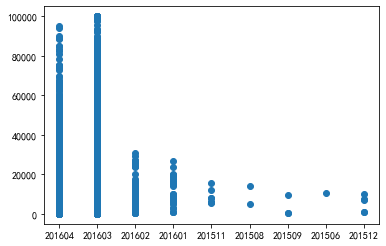

In [16]:
#年月价格散点图
plt.scatter(data['creatDate'].apply(lambda x:str(x)[:6]),data['price'])
plt.show()

### 处理 brand
汽车品牌毫无疑问也是重要特征；直接可以考虑将车型和品牌结合起来处理。

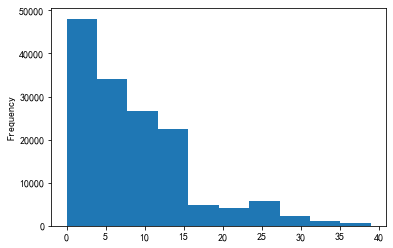

In [17]:
data['brand'].plot(kind='hist')
plt.show()

In [18]:
data['brand'].value_counts()

0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64

### 处理 model

根据常识，车型编码会是影响价格的重要因素，所以必须保留。

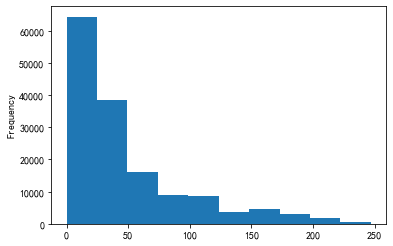

In [19]:
data['model'].plot(kind='hist')
plt.show()

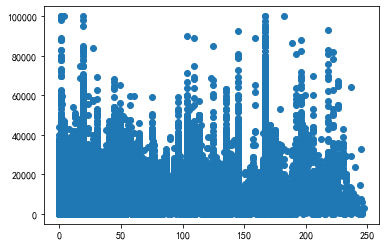

In [20]:
#车型价格散点图
data_copy=data.copy()
data_copy.sort_values(by='model',ascending=False)
plt.scatter(data_copy['model'],data_copy['price'])
plt.show()

### 处理 body_type


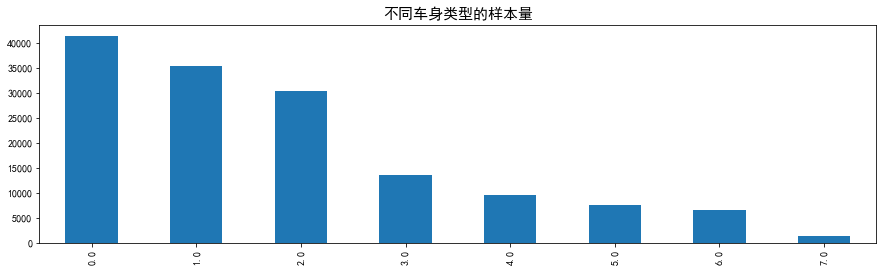

In [21]:
#  不同车身类型样本数据 豪华轿车：0，微型车：1，厢型车：2，大巴车：3，敞篷车：4，双门汽车：5，商务车：6，搅拌车：7
data['bodyType'].value_counts().plot(kind='bar',figsize=(15,4))
plt.title('不同车身类型的样本量',fontsize=15)
plt.show()

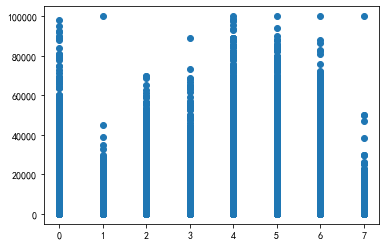

In [22]:
#车型价格散点图
data_copy=data.copy()
data_copy.sort_values(by='bodyType',ascending=False)
plt.scatter(data_copy['bodyType'],data_copy['price'])
plt.show()

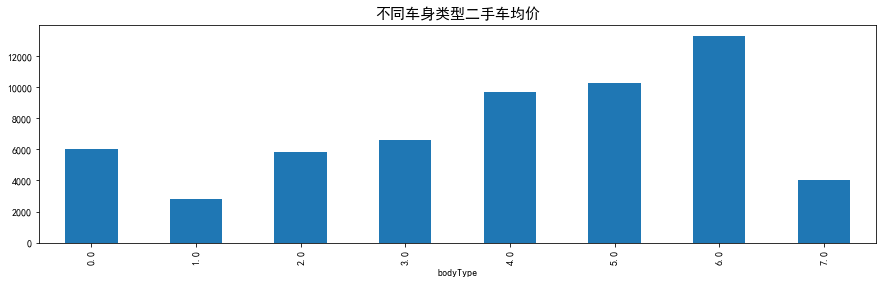

In [23]:
# 不同车型的二手车均价
data.groupby(['bodyType'])['price'].mean().plot(kind='bar',figsize=(15,4))
plt.title('不同车身类型二手车均价',fontsize=15)
plt.show()

### 处理fuelType


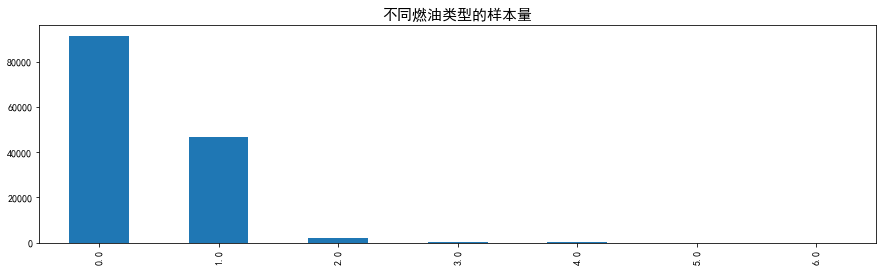

In [24]:
#  不同燃油类型样本数据 汽油：0，柴油：1，液化石油气：2，天然气：3，混合动力：4，其他：5，电动：6 
data['fuelType'].value_counts().plot(kind='bar',figsize=(15,4))
plt.title('不同燃油类型的样本量',fontsize=15)
plt.show()

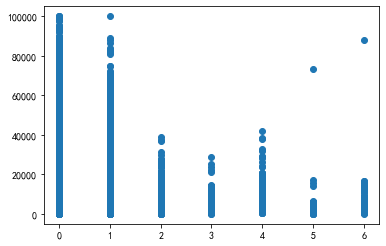

In [25]:
#燃油类型价格散点图
data_copy=data.copy()
data_copy.sort_values(by='fuelType',ascending=False)
plt.scatter(data_copy['fuelType'],data_copy['price'])
plt.show()

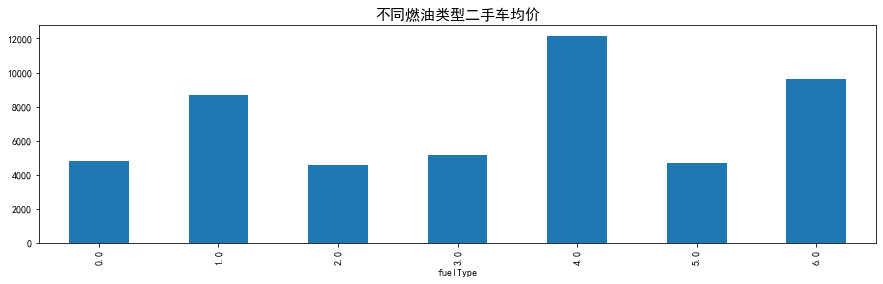

In [26]:
# 不同燃油类型的二手车均价
data.groupby(['fuelType'])['price'].mean().plot(kind='bar',figsize=(15,4))
plt.title('不同燃油类型二手车均价',fontsize=15)
plt.show()

### 处理 gearbox

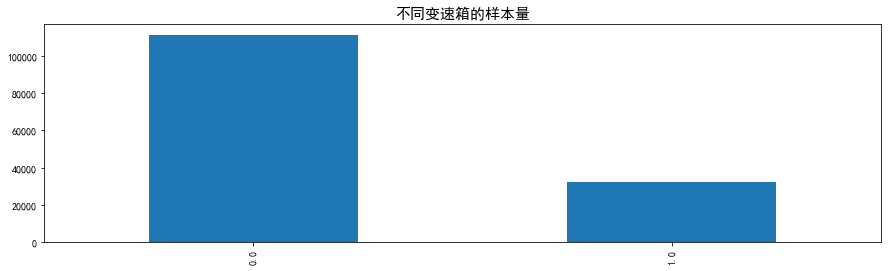

In [27]:
#  gearbox: 变速箱：手动：0，自动：1
data['gearbox'].value_counts().plot(kind='bar',figsize=(15,4))
plt.title('不同变速箱的样本量',fontsize=15)
plt.show()

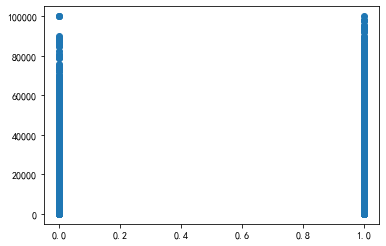

In [28]:
#变速箱类型价格散点图
data_copy=data.copy()
data_copy.sort_values(by='gearbox',ascending=False)
plt.scatter(data_copy['gearbox'],data_copy['price'])
plt.show()

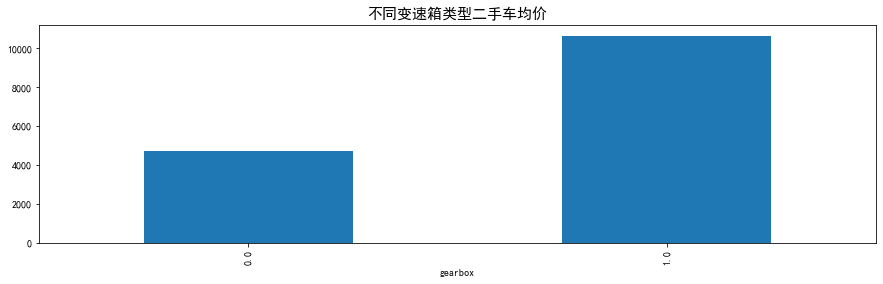

In [29]:
# 不同变速箱类型的二手车均价
data.groupby(['gearbox'])['price'].mean().plot(kind='bar',figsize=(15,4))
plt.title('不同变速箱类型二手车均价',fontsize=15)
plt.show()

### 处理notRepairedDamage


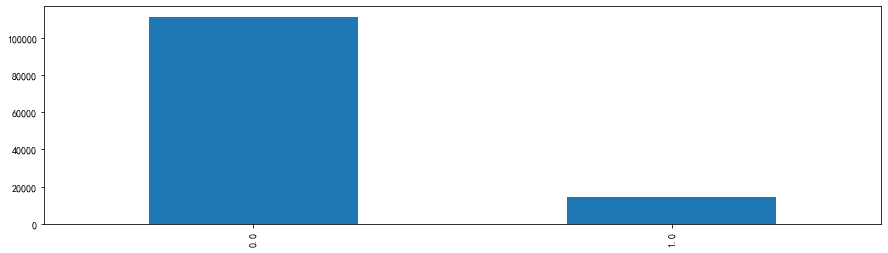

In [30]:
data['notRepairedDamage']=data['notRepairedDamage'].apply(lambda x:np.nan if x=='-' else x)
data['notRepairedDamage'].value_counts().plot(kind='bar',figsize=(15,4))
plt.show()

### 处理 seller和offerType

In [31]:
data['seller'].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [32]:
data['offerType'].value_counts()

0    150000
Name: offerType, dtype: int64

### 处理 power和kilometer

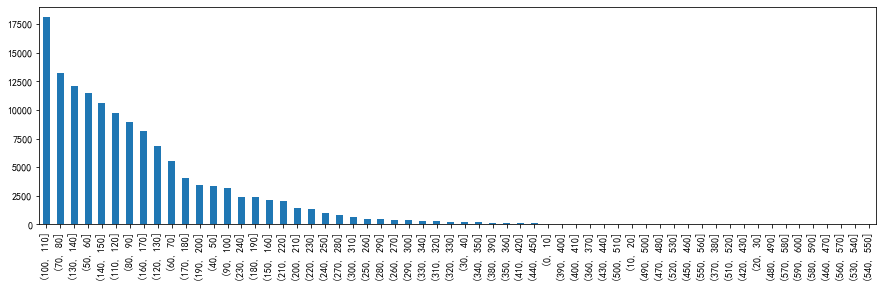

In [33]:
bin = [i*10 for i in range(61)]
data['power_bin']=pd.cut(data['power'],bin)
pd.cut(data['power'],bin).value_counts().plot(kind='bar',figsize=(15,4))
plt.show()

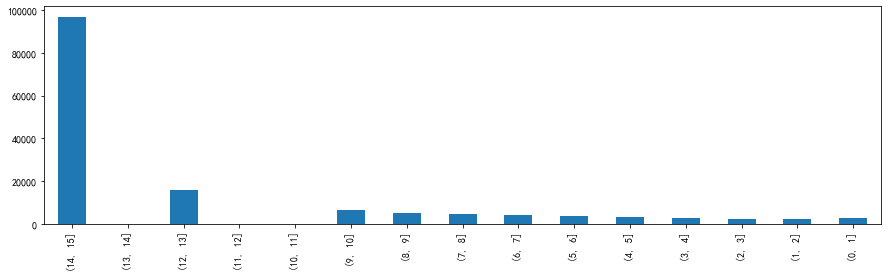

In [34]:
# 行驶公里数
bin = [i*1 for i in range(16)]
data['kilometer_bin']=pd.cut(data['kilometer'],bin)
pd.cut(data['kilometer'],bin).value_counts().sort_index(ascending=False).plot(kind='bar',figsize=(15,4))
plt.show()

In [35]:
# 相关性分析
print(data['power'].corr(data['price'], method='spearman'))
print(data['kilometer'].corr(data['price'], method='spearman'))

0.5773425426332196
-0.4097783640876424


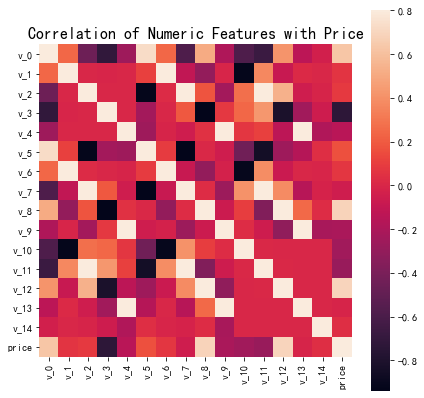

In [36]:
# 匿名变量相关性热力图
data_numeric = data[[ 'v_0', 'v_1', 'v_2', 'v_3','v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14','price']]
correlation = data_numeric.corr()

f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)
plt.show()

### 综合以上特征工程，对特征的探索如下：
+ price取对数 
+ 删除了seller、offerType两列特征 
+ 对power取log然后归一化 
+ 对model的缺失值采用众数填充 
+ 对于fueltime特征，凡是大于2的都归类为2 
+ 对power特征进行分桶 

In [80]:
test_data=pd.read_csv('used_car_testB_20200421.csv',sep=' ')
train_data=pd.read_csv('used_car_train_20200313.csv',sep=' ')

In [81]:
test_data['train']=0
train_data['train']=1
data=pd.concat([train_data,test_data],axis=0)
data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'train'],
      dtype='object')

In [82]:
data['notRepairedDamage'].replace('-',np.nan,inplace = True)
data['notRepairedDamage'] = data['notRepairedDamage'].astype(float)

In [83]:
#  用中位数填充缺失值：
cat_null = ['bodyType','fuelType','gearbox','notRepairedDamage','model']
for i in cat_null:
    data[i].replace(np.nan,data[i].median(),inplace = True)

In [84]:
from sklearn.preprocessing import PolynomialFeatures

# 二元项变换
feature_cols = [col for col in data.columns if col not in ['SaleID','price','train','offerType']]
poly_data = data[feature_cols] 
poly = PolynomialFeatures(2)
poly_data_ndarray = poly.fit_transform(poly_data)
poly_data_final = pd.DataFrame(poly_data_ndarray)
poly_data_final.columns = poly.get_feature_names(poly_data.columns)   

# 将二次转换过后的数据拼接到原数据集上
Merge_cols = ['price','SaleID','train']
poly_data_merge = data[Merge_cols]
data = poly_data_merge.merge(poly_data_final, how='left',right_index=True,left_index=True) 

## 三、建模

In [85]:
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,  make_scorer

In [86]:
train_set= data[data['train']== 1]
X =train_set.drop(['price'],axis = 1)
y = np.log(train_set['price'] + 1)
#X.drop(['price'],axis = 1,inplace = True)

In [87]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.3,random_state = 160)

In [88]:
model = LGBMRegressor(num_leaves=64,
                          max_depth=10,
                          min_data_in_leaf=5,
                          learning_rate=0.1,
                          n_estimators=100000,
                          bagging_fraction=0.8,
                          feature_fraction=0.8,
                          lambda_l1=1,
                          lambda_l2=1,
                          random_state=15,
                          metric='mae',
                          objective='regression'
                          )

In [89]:
lgb_model = model.fit(X_train,
                       y_train,
                       eval_names=['train', 'valid'],
                       eval_set=[(X_train, y_train), (X_valid, y_valid)],
                       verbose=500,
                       eval_metric='mae',
                       early_stopping_rounds=100)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
Training until validation scores don't improve for 100 rounds
[500]	train's l1: 0.0820715	valid's l1: 0.123795
[1000]	train's l1: 0.059483	valid's l1: 0.120233
[1500]	train's l1: 0.045967	valid's l1: 0.11859
[2000]	train's l1: 0.037213	valid's l1: 0.117555
[2500]	train's l1: 0.0308191	valid's l1: 0.117009
[3000]	train's l1: 0.0261272	valid's l1: 0.116586
[3500]	train's l1: 0.022577	valid's l1: 0.116277
[4000]	train's l1: 0.019781	valid'

In [90]:
## 转换为原数据，查看测试集表现
Ypred = np.exp(lgb_model.predict(X_valid)) - 1
#Ypred = model.predict(Xtest)
mean_absolute_error(np.exp(y_valid) - 1,Ypred)

500.1331643581114